In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
cwd = fr"C:\Users\juanb\Documents\BAVARIA\Data"

In [3]:
df_venta = pd.read_csv(fr"{cwd}\Input2_clientes_venta.csv", sep = ";")

In [4]:
df_venta["Fecha"] = pd.to_datetime(df_venta["Año"].astype(str) + df_venta["Mes"].map('{:02d}'.format), format="%Y%m")
df_venta

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,Fecha
0,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_1,CapacidadEnvase_12,0.112229,-30.590603,900.328567,2019-05-01
1,2019,5,10,SegmentoPrecio_1,Marca_2,Cupo_2,CapacidadEnvase_10,0.021734,0.000000,149.184463,2019-05-01
2,2019,5,10,SegmentoPrecio_2,Marca_3,Cupo_2,CapacidadEnvase_10,0.043469,0.000000,359.625828,2019-05-01
3,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_16,0.026345,-31.065261,134.748399,2019-05-01
4,2019,5,10,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.086938,0.000000,496.901005,2019-05-01
...,...,...,...,...,...,...,...,...,...,...,...
1406111,2020,8,20577,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.039122,0.000000,544.150314,2020-08-01
1406112,2020,7,20580,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000,2020-07-01
1406113,2020,7,20580,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.058683,0.000000,759.218996,2020-07-01
1406114,2020,9,20580,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000,2020-09-01


In [5]:
df_clientes = pd.read_csv(fr"{cwd}\Input1_clientes_estructura.csv", sep = ";")
df_clientes

,Cliente,Regional2,Gerencia2,SubCanal2,Categoria,Nevera
0,1,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
1,2,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
2,3,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
3,4,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,1
4,5,Regional 1,Gerencia_1,Subcanal_1,Categoria_2,1
...,...,...,...,...,...,...
20916,20917,Regional 1,Gerencia_1,Subcanal_31,Categoria_2,0
20917,20918,Regional 1,Gerencia_4,Subcanal_31,Categoria_1,0
20918,20919,Regional 1,Gerencia_9,Subcanal_31,Categoria_1,0
20919,20920,Regional 1,Gerencia_10,Subcanal_31,Categoria_1,0


In [190]:
df_test = pd.read_csv(fr"{cwd}\Input3_clientes_test_5.csv", sep = ";")
df_test

,Cliente,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
0,10,0.390000,0.384761,0.528871,0.620000,0.610000
1,12,0.230000,0.843000,0.545422,0.120000,0.030000
2,14,0.680000,0.272290,0.553130,0.060000,0.060000
3,15,0.920000,0.337958,0.302522,0.300000,0.330000
4,18,0.480000,0.263524,0.303468,0.090000,0.180000
...,...,...,...,...,...,...
9297,20186,0.030000,0.149036,0.159453,0.630000,0.590000
9298,20261,0.170000,0.062074,0.046851,0.900000,0.900000
9299,20309,0.059163,0.073033,0.085601,0.489594,0.418825
9300,20360,0.120000,0.035598,0.065089,0.880000,0.980000


## Producto 3

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve, accuracy_score
import xgboost as xgb

In [208]:
df_prod_t = pd.read_pickle("df_prod3_t.pkl")
df_prod_t = pd.get_dummies(df_prod_t)
df_prod_t

,disc_ProdOt31,Volumen_ProdOt68,Volumen_ProdOt7,disc_ProdOt39,nr_ProdInno2,nr_ProdOt19,nr_ProdOt78,nr_ProdOt87,disc_Prod1,disc_ProdOt22,...,Gerencia2_Gerencia_2,Gerencia2_Gerencia_3,Gerencia2_Gerencia_4,Gerencia2_Gerencia_5,Gerencia2_Gerencia_6,Gerencia2_Gerencia_7,Gerencia2_Gerencia_8,Gerencia2_Gerencia_9,Nevera_0,Nevera_1
Cliente,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
5,0.0,0.0,0.021734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20917,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
20918,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
20919,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0


In [209]:
df_prod = pd.read_pickle("df_prod3.pkl")
df_prod

,Prod3,Gerencia2,SubCanal2,Categoria,Nevera,Volumen_Prod1,Volumen_Prod2,Volumen_Prod3,Volumen_ProdInno1,Volumen_ProdInno2,...,nr_ProdOt85,nr_ProdOt86,nr_ProdOt87,nr_ProdOt88,nr_ProdOt89,nr_ProdOt9,nr_ProdOt91,nr_ProdOt92,nr_ProdOt93,nr_ProdOt98
Cliente,,,,,,,,,,,,,,,,,,,,,
10,0.0,Gerencia_3,Subcanal_1,Categoria_2,1,0.0,0.0,0.187048,0.136927,0.019561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5843,0.0,Gerencia_1,Subcanal_3,Categoria_1,1,0.0,0.0,0.004676,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4539,0.0,Gerencia_10,Subcanal_3,Categoria_2,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4536,0.0,Gerencia_10,Subcanal_3,Categoria_2,1,0.0,0.0,0.000000,0.078244,0.039122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11769,0.0,Gerencia_3,Subcanal_3,Categoria_3,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19334,0.0,Gerencia_1,Subcanal_10,Categoria_2,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19714,1.0,Gerencia_1,Subcanal_8,Categoria_3,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19702,0.0,Gerencia_3,Subcanal_21,Categoria_3,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [210]:
df_pd = pd.get_dummies(df_prod)
df_pd

,Prod3,Volumen_Prod1,Volumen_Prod2,Volumen_Prod3,Volumen_ProdInno1,Volumen_ProdInno2,Volumen_ProdOt1,Volumen_ProdOt10,Volumen_ProdOt11,Volumen_ProdOt12,...,SubCanal2_Subcanal_8,SubCanal2_Subcanal_9,Categoria_Categoria_1,Categoria_Categoria_2,Categoria_Categoria_3,Categoria_Categoria_4,Categoria_Categoria_5,Categoria_Categoria_6,Nevera_0,Nevera_1
Cliente,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.0,0.0,0.187048,0.136927,0.019561,0.177695,0.014173,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
5843,0.0,0.0,0.0,0.004676,0.000000,0.000000,0.000000,0.046064,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4539,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4536,0.0,0.0,0.0,0.000000,0.078244,0.039122,0.000000,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
11769,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19334,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
19714,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,1,0,0,0,1,0,0,0,1,0
19702,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [211]:
df_c = df_pd[df_pd.index.isin(df_test["Cliente"])]
df_c

,Prod3,Volumen_Prod1,Volumen_Prod2,Volumen_Prod3,Volumen_ProdInno1,Volumen_ProdInno2,Volumen_ProdOt1,Volumen_ProdOt10,Volumen_ProdOt11,Volumen_ProdOt12,...,SubCanal2_Subcanal_8,SubCanal2_Subcanal_9,Categoria_Categoria_1,Categoria_Categoria_2,Categoria_Categoria_3,Categoria_Categoria_4,Categoria_Categoria_5,Categoria_Categoria_6,Nevera_0,Nevera_1
Cliente,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.0,0.0,0.187048,0.136927,0.019561,0.177695,0.014173,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,1
4539,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
4546,0.0,0.0,0.0,0.093524,0.019561,0.000000,0.467619,0.119057,0.152141,0.110121,...,0,0,0,0,1,0,0,0,0,1
3092,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.037410,0.036851,0.000000,0.000000,...,0,0,1,0,0,0,0,0,0,1
4535,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,1,0
18878,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
18996,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,0,0,0,1,0,0,0,1,0


In [125]:
df_true = df_pd[df_pd["Prod3"] == 1]
df_false = df_pd[df_pd["Prod3"] == 0]

In [126]:
df_false = df_false.sample(n=df_true.shape[0]*2)

In [127]:
df_resampled =df_true.append(df_false).sample(frac = 1) 
df_resampled

,Prod3,Volumen_Prod1,Volumen_Prod2,Volumen_Prod3,Volumen_ProdInno1,Volumen_ProdInno2,Volumen_ProdOt1,Volumen_ProdOt10,Volumen_ProdOt11,Volumen_ProdOt12,...,SubCanal2_Subcanal_8,SubCanal2_Subcanal_9,Categoria_Categoria_1,Categoria_Categoria_2,Categoria_Categoria_3,Categoria_Categoria_4,Categoria_Categoria_5,Categoria_Categoria_6,Nevera_0,Nevera_1
Cliente,,,,,,,,,,,,,,,,,,,,,
16496,1.0,0.000000,0.0,0.081054,0.000000,0.000000,0.476971,0.903559,0.000000,0.554227,...,0,0,0,1,0,0,0,0,0,1
17216,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.018705,0.014173,0.000000,0.000000,...,0,0,1,0,0,0,0,0,1,0
15568,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,1,0
10223,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.014173,0.021734,0.013041,...,0,0,0,0,1,0,0,0,0,1
6290,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7613,1.0,0.016861,0.0,0.009352,0.000000,0.000000,0.000000,0.000000,0.057958,0.034775,...,0,0,0,1,0,0,0,0,0,1
12021,1.0,0.000000,0.0,0.037410,0.000000,0.000000,0.000000,0.014173,0.032602,0.000000,...,0,0,0,0,1,0,0,0,0,1
7837,1.0,0.000000,0.0,0.317981,0.136927,0.097805,0.550037,0.633377,0.000000,0.178041,...,0,0,0,0,0,1,0,0,0,1


In [128]:
X = df_resampled.drop(columns=["Prod3"])
Y = df_resampled[["Prod3"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Random Forest

In [143]:
clf = RandomForestClassifier()

In [144]:
clf.fit(X_train, y_train)

<ipython-input-144-4f66baab8f93>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier()

In [145]:
clf.score(X_train, y_train)

0.9858894286375203

In [146]:
clf.score(X_test, y_test)

0.8630897317298798

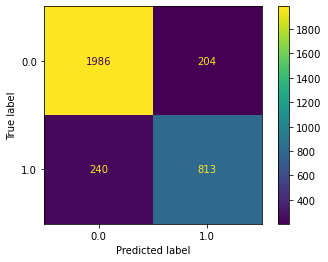

In [147]:
plot_confusion_matrix(clf, X_test, y_test)

In [148]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.8918328584995251

In [171]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [172]:
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 19.1min finished
E:\Users\juanb\anaconda3\envs\bavaria\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [41]:
import copy

In [173]:
best_rf = copy.deepcopy(rf_random.best_estimator_)

In [174]:
best_rf.score(X_train, y_train)

0.9422468964453697

In [175]:
best_rf.score(X_test, y_test)

0.8640148011100832

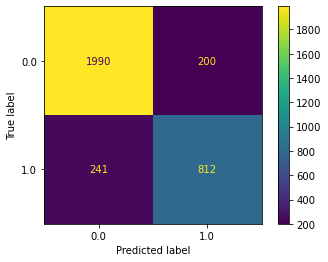

In [176]:
plot_confusion_matrix(best_rf, X_test, y_test)

In [177]:
roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

0.901020784278014

In [73]:
import pickle

In [74]:
with open('model3.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

In [ ]:
best_rf

### SVMC

In [21]:
clf2 = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))

In [22]:
clf2.fit(X_train, y_train)

E:\Users\juanb\anaconda3\envs\bavaria\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True))])

In [23]:
clf2.score(X_test, y_test)

0.7740350877192983

In [24]:
clf2.score(X_train, y_train)

0.7975438596491228

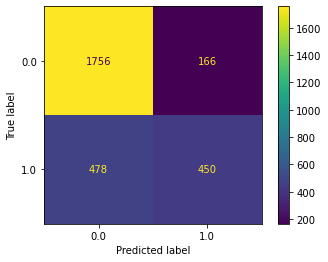

In [25]:
plot_confusion_matrix(clf2, X_test, y_test)

In [26]:
roc_auc_score(y_test, clf2.predict_proba(X_test)[:, 1])

0.8310146354372241

### XgBoost

In [160]:
param = {"booster":"gbtree", "max_depth": 100, "eta": 0.3, "objective": "binary:logistic", "nthread":2}
num_round = 100
train_mat = xgb.DMatrix(X_train, label=y_train)
test_mat = xgb.DMatrix(X_test, label=y_test)
all_mat = xgb.DMatrix(df_c.drop(columns=["Prod3"]), label=df_c[["Prod3"]])

evaluation = [(test_mat, "eval"), (train_mat, "train")]

In [161]:
bst = xgb.train(param, train_mat, num_round, evaluation)

[0]	eval-error:0.17361	train-error:0.09091
[1]	eval-error:0.16312	train-error:0.07163
[2]	eval-error:0.16189	train-error:0.06161
[3]	eval-error:0.15880	train-error:0.05505
[4]	eval-error:0.15603	train-error:0.04719
[5]	eval-error:0.15510	train-error:0.04272
[6]	eval-error:0.15325	train-error:0.03825
[7]	eval-error:0.15079	train-error:0.03485
[8]	eval-error:0.15202	train-error:0.03262
[9]	eval-error:0.15048	train-error:0.03000
[10]	eval-error:0.15202	train-error:0.02768
[11]	eval-error:0.15079	train-error:0.02629
[12]	eval-error:0.14832	train-error:0.02383
[13]	eval-error:0.14955	train-error:0.02290
[14]	eval-error:0.14924	train-error:0.02182
[15]	eval-error:0.14678	train-error:0.02066
[16]	eval-error:0.14616	train-error:0.01974
[17]	eval-error:0.14647	train-error:0.01897
[18]	eval-error:0.14647	train-error:0.01827
[19]	eval-error:0.14524	train-error:0.01812
[20]	eval-error:0.14647	train-error:0.01781
[21]	eval-error:0.14647	train-error:0.01750
[22]	eval-error:0.14616	train-error:0.0172

In [162]:
clf3 = xgb.XGBModel(**param)

In [163]:
clf3.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='logloss')

[0]	validation_0-logloss:0.52032	validation_1-logloss:0.55631
[1]	validation_0-logloss:0.41735	validation_1-logloss:0.48235
[2]	validation_0-logloss:0.34654	validation_1-logloss:0.44187
[3]	validation_0-logloss:0.29564	validation_1-logloss:0.41726
[4]	validation_0-logloss:0.25660	validation_1-logloss:0.40257
[5]	validation_0-logloss:0.22673	validation_1-logloss:0.39420
[6]	validation_0-logloss:0.20267	validation_1-logloss:0.38998
[7]	validation_0-logloss:0.18324	validation_1-logloss:0.38606
[8]	validation_0-logloss:0.16737	validation_1-logloss:0.38484
[9]	validation_0-logloss:0.15425	validation_1-logloss:0.38517
[10]	validation_0-logloss:0.14296	validation_1-logloss:0.38718
[11]	validation_0-logloss:0.13295	validation_1-logloss:0.38727
[12]	validation_0-logloss:0.12490	validation_1-logloss:0.38924
[13]	validation_0-logloss:0.11818	validation_1-logloss:0.39078
[14]	validation_0-logloss:0.11218	validation_1-logloss:0.39366
[15]	validation_0-logloss:0.10695	validation_1-logloss:0.39790
[1

XGBModel(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0, gpu_id=-1,
         interaction_constraints='', learning_rate=0.300000012,
         max_delta_step=0, max_depth=100, min_child_weight=1,
         monotone_constraints='()', n_jobs=2, nthread=2, num_parallel_tree=1,
         objective='binary:logistic', random_state=0, reg_alpha=0, reg_lambda=1,
         scale_pos_weight=1, subsample=1, tree_method='exact',
         validate_parameters=1)

In [164]:
roc_auc_score(y_test, bst.predict(test_mat))

0.8856422398279323

In [165]:
roc_auc_score(y_test, clf3.predict(X_test))

0.8856422398279323

No Skill: ROC AUC=0.500
xgboost: ROC AUC=0.886
randomForest: ROC AUC=0.892


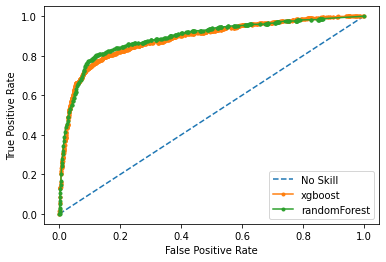

In [166]:
# roc curve and auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
rf_probs = clf.predict_proba(X_test)[:, 1]
xg_probs = clf3.predict(X_test)
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
xg_auc = roc_auc_score(y_test, xg_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('xgboost: ROC AUC=%.3f' % (xg_auc))
print('randomForest: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
xg_fpr, xg_tpr, _ = roc_curve(y_test, xg_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(xg_fpr, xg_tpr, marker='.', label='xgboost')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='randomForest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [138]:
clf.fit(X, Y)

<ipython-input-138-bb7a7515ddfc>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, Y)


RandomForestClassifier()

In [167]:
clf3.fit(X, Y)

XGBModel(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0, gpu_id=-1,
         interaction_constraints='', learning_rate=0.300000012,
         max_delta_step=0, max_depth=100, min_child_weight=1,
         monotone_constraints='()', n_jobs=2, nthread=2, num_parallel_tree=1,
         objective='binary:logistic', random_state=0, reg_alpha=0, reg_lambda=1,
         scale_pos_weight=1, subsample=1, tree_method='exact',
         validate_parameters=1)

In [48]:
best_rf.fit(X, Y)

<ipython-input-48-18f6596e70c4>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf.fit(X, Y)


RandomForestClassifier(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=800)

In [178]:
df_c["predicted"] = best_rf.predict_proba(df_c.drop(columns=["Prod3", "predicted"]))[:, 1]
#df_c["predicted"] = clf3.predict(df_c.drop(columns=["Prod3", "predicted"]))
df_c

<ipython-input-178-079a786acc9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c["predicted"] = best_rf.predict_proba(df_c.drop(columns=["Prod3", "predicted"]))[:, 1]


,Prod3,Volumen_Prod1,Volumen_Prod2,Volumen_Prod3,Volumen_ProdInno1,Volumen_ProdInno2,Volumen_ProdOt1,Volumen_ProdOt10,Volumen_ProdOt11,Volumen_ProdOt12,...,SubCanal2_Subcanal_9,Categoria_Categoria_1,Categoria_Categoria_2,Categoria_Categoria_3,Categoria_Categoria_4,Categoria_Categoria_5,Categoria_Categoria_6,Nevera_0,Nevera_1,predicted
Cliente,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.0,0.0,0.000000,0.136927,0.019561,0.205752,0.000000,0.0,0.000000,...,0,0,1,0,0,0,0,0,1,0.281812
4539,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,1,0,0,0,0,1,0,0.047594
4546,1.0,0.0,0.0,0.056114,0.019561,0.000000,0.467619,0.131105,0.0,0.043469,...,0,0,0,1,0,0,0,0,1,0.929028
3092,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.037410,0.042520,0.0,0.000000,...,0,1,0,0,0,0,0,0,1,0.099832
4535,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,1,0,0,0,0,0,1,0.033233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,0,1,0,0,0,1,0,0.103799
18878,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,1,0,0,0,0,1,0,0.129493
18996,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,0,1,0,0,0,1,0,0.210899


In [179]:
df_a = df_test.copy().set_index("Cliente")
df_a["Marca3"] = df_c[["predicted"]]
df_a

,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
Cliente,,,,,
10,0.390000,0.422045,0.281812,0.620000,0.610000
12,0.230000,0.750508,0.187030,0.120000,0.030000
14,0.680000,0.178546,0.177981,0.060000,0.060000
15,0.920000,0.178047,0.394123,0.300000,0.330000
18,0.480000,0.216901,0.388575,0.090000,0.180000
...,...,...,...,...,...
20186,0.030000,0.147069,0.121055,0.630000,0.590000
20261,0.170000,0.049379,0.034620,0.900000,0.900000
20309,0.059163,0.152190,0.061023,0.489594,0.418825


In [51]:
df_a.to_csv(fr"{cwd}\Input3_clientes_test.csv", sep = ";")

In [180]:
df_a.to_csv(fr"{cwd}\completo21.csv", sep = ",")

In [142]:
df_test.to_csv(fr"{cwd}\completo21.csv", sep = ",", index=False)

In [197]:
model = None
with open('model3.pkl', 'rb') as f:
    model = pickle.load(f)

In [212]:
df_prod_t
df_c2 = df_prod_t[df_prod_t.index.isin(df_test["Cliente"])].copy()

In [214]:
df_c2["predicted"] = model.predict_proba(df_c2.loc[:, df_c.drop(columns=["Prod3", "predicted"]).columns])[:, 1]

In [215]:
df_b = df_test.copy().set_index("Cliente")
df_b["Marca3"] = df_c2[["predicted"]]
df_b

,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
Cliente,,,,,
10,0.390000,0.384761,0.624881,0.620000,0.610000
12,0.230000,0.843000,0.545774,0.120000,0.030000
14,0.680000,0.272290,0.674993,0.060000,0.060000
15,0.920000,0.337958,0.535967,0.300000,0.330000
18,0.480000,0.263524,0.714513,0.090000,0.180000
...,...,...,...,...,...
20186,0.030000,0.149036,0.084862,0.630000,0.590000
20261,0.170000,0.062074,0.043976,0.900000,0.900000
20309,0.059163,0.073033,0.084631,0.489594,0.418825


In [216]:
df_b.to_csv(fr"{cwd}\completo28.csv", sep = ",")

In [220]:
a = list(zip(df_c.drop(columns=["Prod3"]).columns, model.feature_importances_))
a.sort(key=lambda x:x[1], reverse=True)
a

[('nr_Prod3', 0.09291364053549261),
 ('Volumen_Prod3', 0.08806213705366435),
 ('Volumen_ProdOt9', 0.04079411463668935),
 ('nr_ProdOt9', 0.037487136093378295),
 ('nr_ProdOt37', 0.030926851132559885),
 ('Volumen_ProdOt37', 0.025903050108899615),
 ('nr_ProdOt10', 0.023773809165095226),
 ('Volumen_ProdOt16', 0.02331367048029217),
 ('Volumen_ProdOt12', 0.022389988139460755),
 ('Volumen_ProdOt10', 0.02214421502203052),
 ('nr_ProdOt12', 0.022023283588723595),
 ('nr_ProdOt1', 0.021296127077868057),
 ('nr_ProdOt16', 0.019884429639681865),
 ('nr_ProdOt29', 0.01875028010582211),
 ('Volumen_ProdOt1', 0.01730863316504228),
 ('Volumen_ProdOt29', 0.01646488870874185),
 ('nr_ProdOt4', 0.012805725889643365),
 ('Volumen_ProdOt17', 0.012172646161108984),
 ('Volumen_ProdOt4', 0.011594288530085452),
 ('nr_ProdOt6', 0.011253079086486905),
 ('nr_ProdOt7', 0.01118661581701247),
 ('nr_ProdOt17', 0.010909732555092333),
 ('Volumen_ProdOt7', 0.010834685901802431),
 ('Volumen_ProdOt50', 0.010725171485114182),
 ('V